In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from datetime import datetime, timedelta
import missingno as msn

In [2]:
n_samples = 150000
n_category_feat = 5
n_features = 15

In [3]:
df = pd.read_csv('df.csv')

In [19]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,1.971708e+06,1.971708e+06,1.675822e+06,1.971708e+06,1.601221e+06,1.971708e+06,1.576765e+06,1.971708e+06,1.576765e+06,1.576765e+06,1.601221e+06,1.601221e+06,1.576765e+06
mean,1.984754e+06,1.841079e+00,4.532774e+00,6.836609e+00,2.476847e+00,1.627362e+02,1.622182e+02,2.977768e+00,9.528092e-01,2.658456e+01,2.213063e+00,1.342905e-01,5.320852e-01
std,1.146580e+06,6.256488e-01,6.012043e+00,6.452441e+02,1.156693e+01,6.586351e+01,6.998370e+01,3.902406e+00,2.854224e-01,2.314677e+01,9.298435e-01,5.062244e-01,3.609477e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.947000e+01,-1.000000e+00,-1.793370e+03,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,9.917478e+05,2.000000e+00,1.000000e+00,1.030000e+00,1.000000e+00,1.250000e+02,1.130000e+02,0.000000e+00,1.000000e+00,1.586000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,1.985024e+06,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.610000e+02,1.620000e+02,2.380000e+00,1.000000e+00,2.106000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.978039e+06,2.000000e+00,4.000000e+00,3.460000e+00,1.000000e+00,2.330000e+02,2.340000e+02,4.010000e+00,1.000000e+00,2.982000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,3.970551e+06,7.000000e+00,1.999998e+01,3.357837e+05,9.900000e+01,2.650000e+02,2.650000e+02,3.934600e+02,1.000000e+00,1.793370e+03,2.500000e+00,6.750000e+00,7.500000e-01


In [17]:
df[df['RatecodeID'] == 99.0]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
1540,3058,1,2025-04-01 03:39:15,2025-04-01 04:04:56,1.000000,13.9,99.0,175,65.0,Card,0.0,1.0,47.00,0.0,0.0,0.0
1591,3145,1,2025-04-01 03:31:20,2025-04-01 04:01:00,15.304206,0.0,99.0,131,137.0,Card,0.0,1.0,51.94,0.0,0.0,0.0
1688,3335,1,2025-04-01 04:36:03,2025-04-01 04:59:35,1.000000,0.0,99.0,173,169.0,Card,0.0,1.0,45.94,0.0,0.0,0.0
1717,3390,1,NaN,2025-04-01 05:09:11,18.467346,13.6,99.0,215,113.0,Card,0.0,1.0,53.94,0.0,0.0,0.0
1726,3419,1,2025-04-01 04:07:28,2025-04-01 04:23:19,1.000000,7.2,99.0,248,166.0,Card,0.0,1.0,32.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598004,3218357,1,2025-04-30 22:48:52,2025-04-30 23:14:58,10.268472,12.0,99.0,191,222.0,Card,0.0,0.0,43.00,0.0,0.0,0.0
1598544,3219442,1,2025-04-30 22:18:56,2025-04-30 22:38:41,1.000000,3.8,99.0,134,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN
1599016,3220400,1,2025-04-30 22:49:45,2025-04-30 23:37:29,1.000000,13.7,99.0,191,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN
1599330,3221012,1,2025-04-30 23:56:55,2025-05-01 00:38:22,1.000000,6.8,99.0,261,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN


<Axes: >

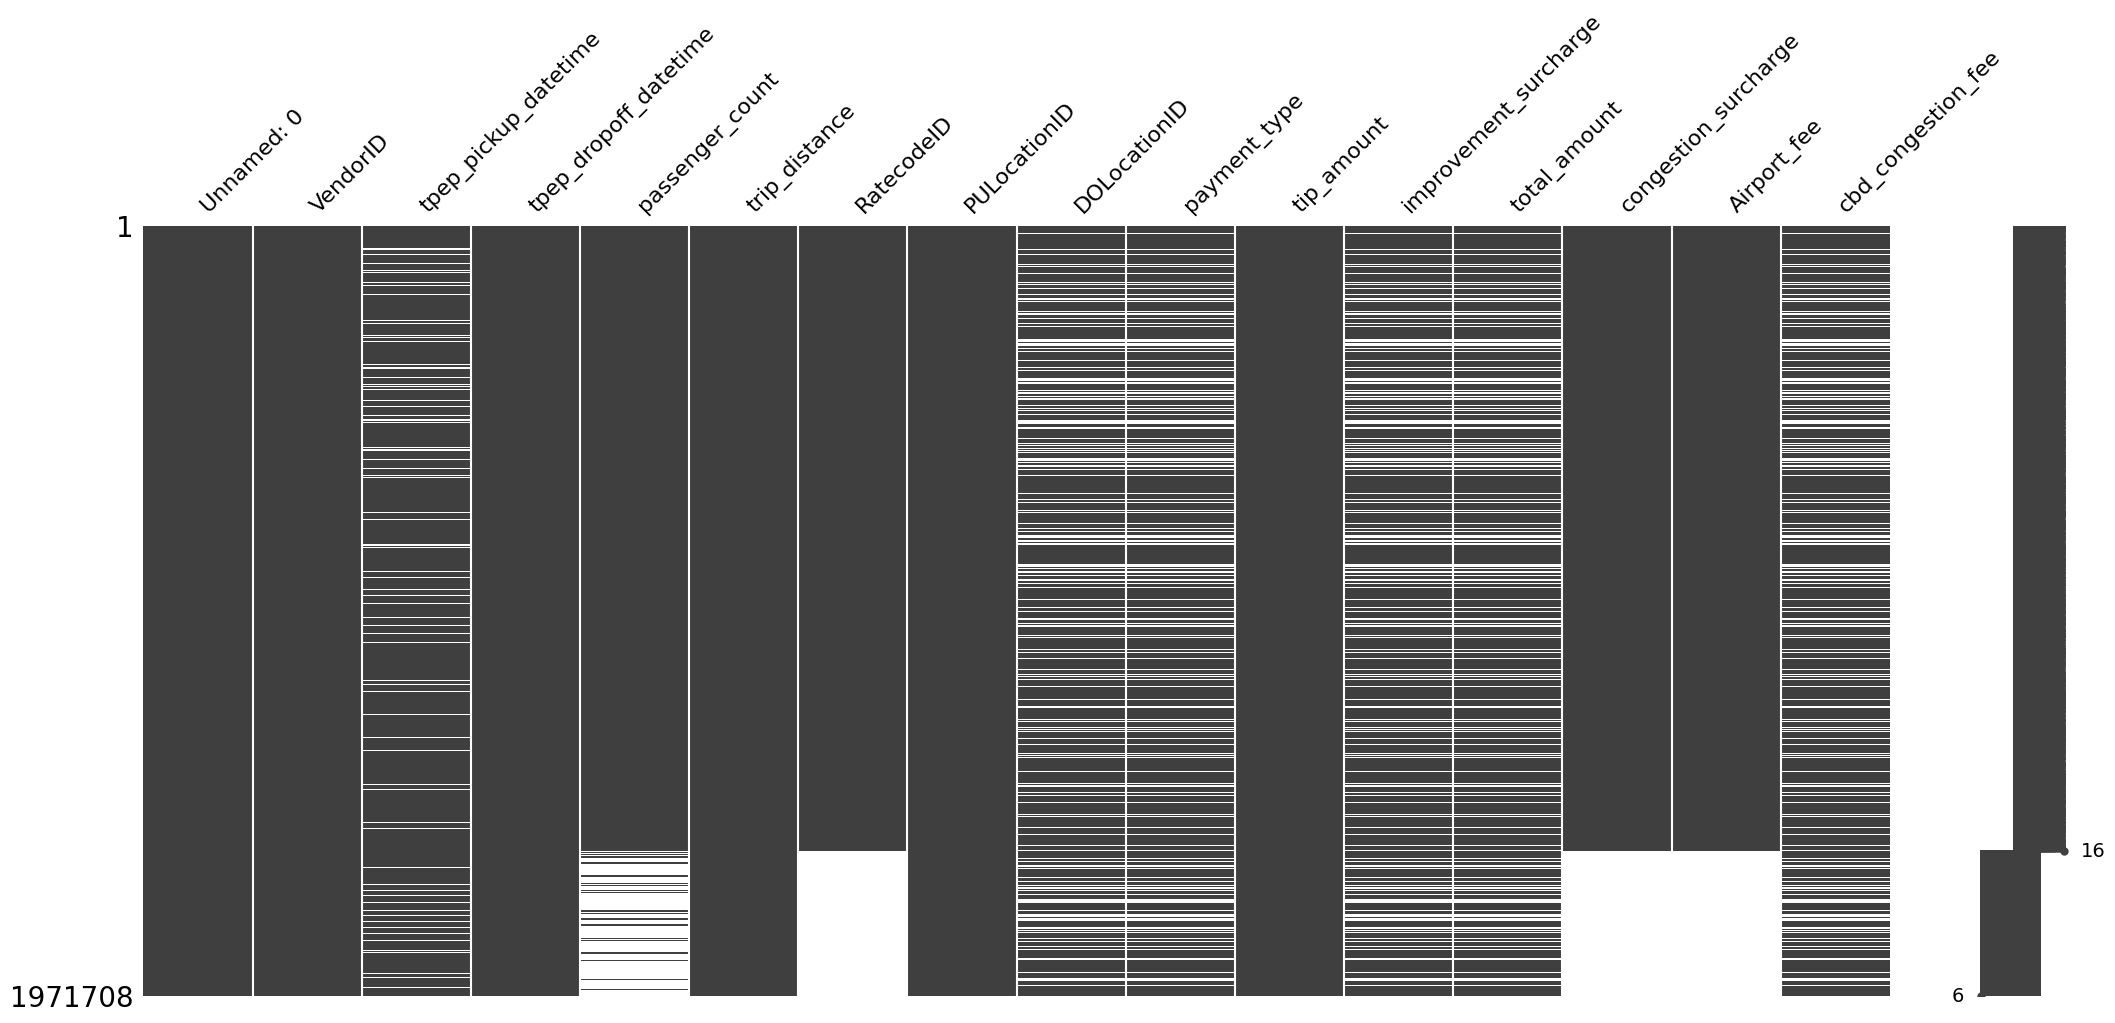

In [11]:
msn.matrix(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971708 entries, 0 to 1971707
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   PULocationID           int64  
 8   DOLocationID           float64
 9   payment_type           object 
 10  tip_amount             float64
 11  improvement_surcharge  float64
 12  total_amount           float64
 13  congestion_surcharge   float64
 14  Airport_fee            float64
 15  cbd_congestion_fee     float64
dtypes: float64(10), int64(3), object(3)
memory usage: 240.7+ MB


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee


In [ ]:
# np.random.seed(27)
# drop_indecies = np.random.choice(df.shape[0], size = int(df.shape[0]* 0.7))

In [ ]:
# df = df.drop(drop_indecies)

In [ ]:
# df = df.sort_index(axis=1)

In [228]:
df

,Airport_fee,DOLocationID,PULocationID,RatecodeID,VendorID,cbd_congestion_fee,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,1.75,230,138,1.0,1,0.75,2.5,11.00,38.70,1.0,0.5,1.0,1,N,11.65,6.94,69.79,2025-04-01 01:13:25,2025-04-01 00:47:06,9.50
3,0.00,4,79,1.0,1,0.75,2.5,4.25,6.50,1.0,0.5,2.0,1,N,2.45,0.00,14.70,2025-04-01 01:00:49,2025-04-01 00:56:30,0.60
4,0.00,229,161,1.0,2,0.75,2.5,1.00,4.40,1.0,0.5,1.0,2,N,0.00,0.00,10.15,2025-04-01 00:16:19,2025-04-01 00:00:17,0.43
5,0.00,164,233,1.0,7,0.75,2.5,0.00,5.80,1.0,0.5,1.0,1,N,0.00,0.00,11.55,2025-04-01 00:39:00,2025-04-01 00:39:00,0.95
6,1.75,140,138,1.0,2,0.00,2.5,6.00,35.90,1.0,0.5,1.0,1,N,10.57,6.94,65.16,2025-04-01 01:14:10,2025-04-01 00:54:37,8.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970543,NaN,163,209,NaN,2,0.75,NaN,0.00,-4.75,1.0,0.5,NaN,0,None,0.00,0.00,7.50,2025-04-30 23:30:43,2025-04-30 23:09:02,5.86
3970547,NaN,238,137,NaN,2,0.75,NaN,0.00,19.27,1.0,0.5,NaN,0,None,0.00,0.00,24.02,2025-05-01 00:00:50,2025-04-30 23:44:23,3.80
3970548,NaN,243,48,NaN,2,0.75,NaN,0.00,-4.75,1.0,0.5,NaN,0,None,0.00,0.00,5.07,2025-05-01 00:06:12,2025-04-30 23:37:25,8.77
3970550,NaN,45,68,NaN,2,0.75,NaN,0.00,-4.75,1.0,0.5,NaN,0,None,0.00,0.00,3.81,2025-04-30 23:46:09,2025-04-30 23:31:55,2.49


In [4]:
df['DOLocationID'] =df['DOLocationID'].astype('category')
df['PULocationID'] = df['PULocationID'].astype('category')

In [5]:
df['payment_type'] = df['payment_type'].map({1:'Card', 2:'Cash', 3: 'Phone',4: 'Bank',0: 'Undefiend'})

In [171]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-04-01 00:47:06,2025-04-01 01:13:25,1.0,9.50,1.0,N,138,230,Card,38.70,11.00,0.5,11.65,6.94,1.0,69.79,2.5,1.75,0.75
3,1,2025-04-01 00:56:30,2025-04-01 01:00:49,2.0,0.60,1.0,N,79,4,Card,6.50,4.25,0.5,2.45,0.00,1.0,14.70,2.5,0.00,0.75
4,2,2025-04-01 00:00:17,2025-04-01 00:16:19,1.0,0.43,1.0,N,161,229,Cash,4.40,1.00,0.5,0.00,0.00,1.0,10.15,2.5,0.00,0.75
5,7,2025-04-01 00:39:00,2025-04-01 00:39:00,1.0,0.95,1.0,N,233,164,Card,5.80,0.00,0.5,0.00,0.00,1.0,11.55,2.5,0.00,0.75
6,2,2025-04-01 00:54:37,2025-04-01 01:14:10,1.0,8.94,1.0,N,138,140,Card,35.90,6.00,0.5,10.57,6.94,1.0,65.16,2.5,1.75,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970537,2,2025-04-30 23:20:06,2025-04-30 23:23:36,NaN,0.30,NaN,None,113,113,Undefiend,5.55,0.00,0.5,0.00,0.00,1.0,10.30,NaN,NaN,0.75
3970538,2,2025-04-30 23:55:52,2025-05-01 00:10:04,NaN,6.49,NaN,None,75,232,Undefiend,-4.75,0.00,0.5,0.00,0.00,1.0,5.14,NaN,NaN,0.75
3970543,2,2025-04-30 23:09:02,2025-04-30 23:30:43,NaN,5.86,NaN,None,209,163,Undefiend,-4.75,0.00,0.5,0.00,0.00,1.0,7.50,NaN,NaN,0.75
3970547,2,2025-04-30 23:44:23,2025-05-01 00:00:50,NaN,3.80,NaN,None,137,238,Undefiend,19.27,0.00,0.5,0.00,0.00,1.0,24.02,NaN,NaN,0.75


In [172]:
df['improvement_surcharge'].unique()

array([ 1. , -1. ,  0. ,  0.3])

In [6]:
df = df.drop(columns=['store_and_fwd_flag','extra', 'mta_tax', 'tolls_amount', 'fare_amount' ])

In [174]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-04-01 00:47:06,2025-04-01 01:13:25,1.0,9.50,1.0,138,230,Card,11.65,1.0,69.79,2.5,1.75,0.75
3,1,2025-04-01 00:56:30,2025-04-01 01:00:49,2.0,0.60,1.0,79,4,Card,2.45,1.0,14.70,2.5,0.00,0.75
4,2,2025-04-01 00:00:17,2025-04-01 00:16:19,1.0,0.43,1.0,161,229,Cash,0.00,1.0,10.15,2.5,0.00,0.75
5,7,2025-04-01 00:39:00,2025-04-01 00:39:00,1.0,0.95,1.0,233,164,Card,0.00,1.0,11.55,2.5,0.00,0.75
6,2,2025-04-01 00:54:37,2025-04-01 01:14:10,1.0,8.94,1.0,138,140,Card,10.57,1.0,65.16,2.5,1.75,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970537,2,2025-04-30 23:20:06,2025-04-30 23:23:36,NaN,0.30,NaN,113,113,Undefiend,0.00,1.0,10.30,NaN,NaN,0.75
3970538,2,2025-04-30 23:55:52,2025-05-01 00:10:04,NaN,6.49,NaN,75,232,Undefiend,0.00,1.0,5.14,NaN,NaN,0.75
3970543,2,2025-04-30 23:09:02,2025-04-30 23:30:43,NaN,5.86,NaN,209,163,Undefiend,0.00,1.0,7.50,NaN,NaN,0.75
3970547,2,2025-04-30 23:44:23,2025-05-01 00:00:50,NaN,3.80,NaN,137,238,Undefiend,0.00,1.0,24.02,NaN,NaN,0.75


In [234]:
df['trip_distance'].describe()

count    3.970553e+06
mean     6.994739e+00
std      6.622386e+02
min      0.000000e+00
25%      1.030000e+00
50%      1.800000e+00
75%      3.460000e+00
max      3.860884e+05
Name: trip_distance, dtype: float64

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970553 entries, 0 to 3970552
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           category      
 7   DOLocationID           category      
 8   payment_type           object        
 9   tip_amount             float64       
 10  improvement_surcharge  float64       
 11  total_amount           float64       
 12  congestion_surcharge   float64       
 13  Airport_fee            float64       
 14  cbd_congestion_fee     float64       
dtypes: category(2), datetime64[us](2), float64(9), int32(1), object(1)
memory usage: 393.8+ MB


In [177]:
df.isna().sum()/df.shape[0]*100

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count          18.795448
trip_distance             0.000000
RatecodeID               18.795448
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
tip_amount                0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge     18.795448
Airport_fee              18.795448
cbd_congestion_fee        0.000000
dtype: float64

In [236]:
df.shape[0]

3970553

In [7]:
np.random.seed(30)
anomaly_indices = np.random.choice(df.shape[0], size = int(0.2 * df.shape[0]),replace=False)

In [8]:
df.loc[anomaly_indices, 'passenger_count'] = np.random.uniform(10, 20, size = len(anomaly_indices))

In [9]:
np.random.seed(13)
anomaly_indices = np.random.choice(df.shape[0], size = int(0.1 * df.shape[0]),replace=False)

In [10]:
df.loc[anomaly_indices, 'tpep_pickup_datetime']= None

In [11]:
np.random.seed(21)
anomaly_indices = np.random.choice(df.shape[0], size = int(0.2 * df.shape[0]),replace=False)

In [12]:
for col in ['DOLocationID', 'payment_type', 'total_amount', 'improvement_surcharge', 'cbd_congestion_fee']:
    df.loc[anomaly_indices, col] = None

In [13]:
df.isna().sum()/df.shape[0]*100

VendorID                  0.000000
tpep_pickup_datetime      9.999992
tpep_dropoff_datetime     0.000000
passenger_count          15.017001
trip_distance             0.000000
RatecodeID               18.781515
PULocationID              0.000000
DOLocationID             19.999985
payment_type             19.999985
tip_amount                0.000000
improvement_surcharge    19.999985
total_amount             19.999985
congestion_surcharge     18.781515
Airport_fee              18.781515
cbd_congestion_fee       19.999985
dtype: float64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970553 entries, 0 to 3970552
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           category      
 7   DOLocationID           category      
 8   payment_type           object        
 9   tip_amount             float64       
 10  improvement_surcharge  float64       
 11  total_amount           float64       
 12  congestion_surcharge   float64       
 13  Airport_fee            float64       
 14  cbd_congestion_fee     float64       
dtypes: category(2), datetime64[us](2), float64(9), int32(1), object(1)
memory usage: 393.8+ MB


In [55]:
df['trip_distance'].describe()

count    3.970553e+06
mean     7.777865e+00
std      6.147481e+02
min      0.000000e+00
25%      1.100000e+00
50%      2.020000e+00
75%      5.140000e+00
max      3.860884e+05
Name: trip_distance, dtype: float64

In [51]:
df['passenger_count'].describe()

count    3.299609e+06
mean     2.955917e+00
std      4.620011e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+01
Name: passenger_count, dtype: float64

In [108]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-04-01 00:47:06,2025-04-01 01:13:25,1.000000,9.500000,1.0,138,NaN,None,11.650000,NaN,NaN,2.5,1.75,NaN
1,2,2025-04-01 00:27:35,2025-04-01 00:38:19,2.000000,3.770000,1.0,138,92,Card,4.900000,1.0,31.150000,0.0,1.75,0.00
2,2,2025-04-01 00:24:07,2025-04-01 00:35:12,10.037265,10.722782,1.0,132,130,Card,14.685093,1.0,11.057513,0.0,1.75,0.00
3,1,2025-04-01 00:56:30,2025-04-01 01:00:49,2.000000,0.600000,1.0,79,4,Card,2.450000,1.0,14.700000,2.5,0.00,0.75
4,2,2025-04-01 00:00:17,2025-04-01 00:16:19,1.000000,0.430000,1.0,161,229,Cash,0.000000,1.0,10.150000,2.5,0.00,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970548,2,2025-04-30 23:37:25,2025-05-01 00:06:12,NaN,8.770000,NaN,48,NaN,None,0.000000,NaN,NaN,NaN,NaN,NaN
3970549,2,2025-04-30 23:53:37,2025-05-01 00:12:34,NaN,3.200000,NaN,234,142,Undefiend,0.000000,1.0,25.750000,NaN,NaN,0.75
3970550,2,2025-04-30 23:31:55,2025-04-30 23:46:09,NaN,2.490000,NaN,68,45,Undefiend,0.000000,1.0,3.810000,NaN,NaN,0.75
3970551,2,2025-04-30 23:27:36,2025-04-30 23:49:01,NaN,3.230000,NaN,186,141,Undefiend,0.000000,1.0,25.160000,NaN,NaN,0.75


In [14]:
np.random.seed(27)
drop_indecies = np.random.choice(df.shape[0], size = int(df.shape[0]* 0.7))

In [15]:
df = df.drop(drop_indecies)

In [246]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-04-01 00:47:06,2025-04-01 01:13:25,1.000000,9.50,1.0,138,NaN,None,11.65,NaN,NaN,2.5,1.75,NaN
3,1,2025-04-01 00:56:30,2025-04-01 01:00:49,2.000000,0.60,1.0,79,4,Card,2.45,1.0,14.70,2.5,0.00,0.75
4,2,NaT,2025-04-01 00:16:19,16.816002,0.43,1.0,161,229,Cash,0.00,1.0,10.15,2.5,0.00,0.75
5,7,NaT,2025-04-01 00:39:00,14.724580,0.95,1.0,233,164,Card,0.00,1.0,11.55,2.5,0.00,0.75
6,2,2025-04-01 00:54:37,2025-04-01 01:14:10,1.000000,8.94,1.0,138,140,Card,10.57,1.0,65.16,2.5,1.75,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970543,2,NaT,2025-04-30 23:30:43,18.135904,5.86,NaN,209,NaN,None,0.00,NaN,NaN,NaN,NaN,NaN
3970547,2,NaT,2025-05-01 00:00:50,18.897476,3.80,NaN,137,238,Undefiend,0.00,1.0,24.02,NaN,NaN,0.75
3970548,2,NaT,2025-05-01 00:06:12,19.338774,8.77,NaN,48,NaN,None,0.00,NaN,NaN,NaN,NaN,NaN
3970550,2,NaT,2025-04-30 23:46:09,14.394723,2.49,NaN,68,45,Undefiend,0.00,1.0,3.81,NaN,NaN,0.75


In [16]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-04-01 00:47:06,2025-04-01 01:13:25,1.000000,9.50,1.0,138,NaN,None,11.65,NaN,NaN,2.5,1.75,NaN
3,1,2025-04-01 00:56:30,2025-04-01 01:00:49,2.000000,0.60,1.0,79,4,Card,2.45,1.0,14.70,2.5,0.00,0.75
4,2,2025-04-01 00:00:17,2025-04-01 00:16:19,16.816002,0.43,1.0,161,229,Cash,0.00,1.0,10.15,2.5,0.00,0.75
5,7,2025-04-01 00:39:00,2025-04-01 00:39:00,14.724580,0.95,1.0,233,164,Card,0.00,1.0,11.55,2.5,0.00,0.75
6,2,NaT,2025-04-01 01:14:10,1.000000,8.94,1.0,138,140,Card,10.57,1.0,65.16,2.5,1.75,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970543,2,2025-04-30 23:09:02,2025-04-30 23:30:43,18.135904,5.86,NaN,209,NaN,None,0.00,NaN,NaN,NaN,NaN,NaN
3970547,2,NaT,2025-05-01 00:00:50,18.897476,3.80,NaN,137,238,Undefiend,0.00,1.0,24.02,NaN,NaN,0.75
3970548,2,2025-04-30 23:37:25,2025-05-01 00:06:12,19.338774,8.77,NaN,48,NaN,None,0.00,NaN,NaN,NaN,NaN,NaN
3970550,2,2025-04-30 23:31:55,2025-04-30 23:46:09,14.394723,2.49,NaN,68,45,Undefiend,0.00,1.0,3.81,NaN,NaN,0.75


In [17]:
df.to_csv('df.csv')

In [ ]:
dataset = get_dataset()
load_data_to_db(dataset, 't_sql_source_unstructured')